In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
sys.path.append('/content/drive/MyDrive/path/Colab Notebooks/binary/qboost')

In [3]:
#################################################################
# Import libraries
#################################################################
import random
import string

# Modelling
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
# import graphviz

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import os
import re
import sys
from sklearn.svm import SVC
from sklearn.cluster import SpectralClustering
from sklearn.metrics import normalized_mutual_info_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
#from qboost.qboost import QBoostClassifier
#from dwave.system.samplers import DWaveSampler
import time
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
#from dwave.system.composites import EmbeddingComposite
import time
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from sklearn.metrics import classification_report
from sklearn import metrics

# import psycopg2
# from psycopg2.extras import RealDictCursor
from imblearn.under_sampling import RandomUnderSampler
from timeit import default_timer as timer
from datetime import *
from collections import Counter
#from connect import connect

# Garbage collection
import gc

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from numpy import mean

from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, f1_score
from collections import Counter


#################################################################
# Import libraries
#################################################################
import random
import string

# Modelling
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
from IPython.display import clear_output
# import graphviz

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import os
import re
import sys
from sklearn.svm import SVC
from sklearn.cluster import SpectralClustering
from sklearn.metrics import normalized_mutual_info_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
#from dwave.system.samplers import DWaveSampler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
#from dwave.system.composites import EmbeddingComposite
import time
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from sklearn.metrics import classification_report
from sklearn import metrics

# import psycopg2
# from psycopg2.extras import RealDictCursor
from timeit import default_timer as timer
from datetime import *
from collections import Counter
#from connect import connect

# Garbage collection
import gc

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from numpy import mean

from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, f1_score
from collections import Counter


In [7]:
# Import Qiskit libraries
from qiskit import QuantumCircuit
from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit.utils import algorithm_globals
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN
from qiskit.circuit.library import EfficientSU2

from qiskit.circuit.library import ZFeatureMap
from qiskit.utils import algorithm_globals
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_machine_learning.algorithms import PegasosQSVC

In [5]:
!pip3 install qiskit

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 62.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 75.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 98.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 117.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [6]:
!pip3 install qiskit_machine_learning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.7/148.7 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 20.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=517919 sha256=82134bfb9adea2ad5c730311211db6f9ac1cbff870f0697d8626eb1bb4695716
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d513c736bb93910277e1528ef4
Successfully built fastdtw


In [ ]:
!pip3 install graphviz

In [8]:
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 50)

In [ ]:
import seaborn as sns

In [10]:
gc.collect()

0

In [9]:
def loadData(path):
    data = pd.read_csv(path)
    # print(data)
    return data

In [11]:
# path = '../../../Dataset/IoT Intrusion Dataset/IoT Network Intrusion Dataset.csv'
path = '/content/drive/My Drive/Colab Notebooks/data/mqtt_train70_reduced.csv'

In [12]:
tpath = '/content/drive/My Drive/Colab Notebooks/data/mqtt_test30_reduced.csv'

In [13]:
dataframe =  loadData(path)

In [14]:
df1 = loadData(tpath)

In [15]:
df = dataframe

In [16]:
df = pd.concat([dataframe, df1])

### Data cleaning
#### 1. Remove all columns which have more than 75% data missing. Check against NaN values.
#### 2. Remove all columns which have (-)ve correlation with the target value
#### 3. Remove all columns which have 0 correlation
#### 4. Remove all columns which have corellation at the 1000th position

#### Find non-numeric features

In [17]:
df.head()

,tcp.flags,tcp.time_delta,tcp.len,mqtt.conack.flags,mqtt.conack.flags.reserved,mqtt.conack.flags.sp,mqtt.conack.val,mqtt.conflag.cleansess,mqtt.conflag.passwd,mqtt.conflag.qos,mqtt.conflag.reserved,mqtt.conflag.retain,mqtt.conflag.uname,mqtt.conflag.willflag,mqtt.conflags,mqtt.dupflag,mqtt.hdrflags,mqtt.kalive,mqtt.len,mqtt.msg,mqtt.msgid,mqtt.msgtype,mqtt.proto_len,mqtt.protoname,mqtt.qos,mqtt.retain,mqtt.sub.qos,mqtt.suback.qos,mqtt.ver,mqtt.willmsg,mqtt.willmsg_len,mqtt.willtopic,mqtt.willtopic_len,target
0,0x00000018,0.998867,10,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0x00000030,0.0,8.0,32,0.0,3.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimate
1,0x00000010,0.000067,1460,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0x00000032,0.0,169.0,6361653943666144654266454162444634326230633041...,2714.0,3.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,dos
2,0x00000010,0.000058,1460,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0x00000032,0.0,163.0,4232646141394333463334613232626446326646383446...,1548.0,3.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,dos
3,0x00000018,0.000227,10,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0x00000030,0.0,8.0,32,0.0,3.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimate
4,0x00000018,0.000236,16,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0x00000040,0.0,2.0,0,2800.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,dos


In [18]:
df.shape

(330936, 34)

### Studying the dataset

In [19]:
non_numeric_columns = df.select_dtypes(exclude=[int, float]).columns.tolist()
print(non_numeric_columns)

['tcp.flags', 'mqtt.conack.flags', 'mqtt.conflags', 'mqtt.hdrflags', 'mqtt.msg', 'mqtt.protoname', 'target']


In [20]:
df['tcp.flags'].unique()

array(['0x00000018', '0x00000010', '0x00000004', '0x00000012',
       '0x00000002', '0x00000011', '0x00000019', '0x00000014'],
      dtype=object)

In [21]:
df['mqtt.conack.flags'].unique()

array(['0', '0x00000000'], dtype=object)

In [22]:
df['mqtt.conflags'].unique()

array(['0', '0x000000c2', '0x00000002', '0x00000082'], dtype=object)

In [23]:
df['mqtt.msg'].unique()

array(['32',
       '63616539436661446542664541624446343262306330416366456435634239346437304441373463314639303642313246323430466537444238333743644242443841613435344442436545313436314634454166366136304166306632366141386161',
       '42326461413943334633346132326264463266463834464137316661343864343545446144353841304633314536463531353765636439666631313366634430313538443065414565343531363442623632333330666237446645396644',
       ...,
       '61623041364444326342334234443942466164353362413461613531423843363266446332413261613131354361426639383831464343663364424364626146623839354365666645613138353543353464453433424143313363634346444641434461',
       '3064623035384238463337336162664263313645386132646233614264463133433434353441446237394142444136446537454239453630393131654636304439666265386641333845353735386465616166363335343236644544454546323061374144',
       '3632633546423430623232664239624266623941654161416233653939343461323736326243386335614139384132303562434443423334364338416538393742333

In [24]:
df['mqtt.protoname'].unique()

array(['0', 'MQTT'], dtype=object)

In [25]:
df['target'].unique()

array(['legitimate', 'dos', 'malformed', 'bruteforce', 'slowite', 'flood'],
      dtype=object)

In [26]:
df['target'].value_counts()['legitimate']

165463

In [27]:
df['target'].value_counts()['dos'] + df['target'].value_counts()['malformed'] + df['target'].value_counts()['bruteforce'] + df['target'].value_counts()['slowite'] + df['target'].value_counts()['flood']

165473

In [28]:
df.head()

,tcp.flags,tcp.time_delta,tcp.len,mqtt.conack.flags,mqtt.conack.flags.reserved,mqtt.conack.flags.sp,mqtt.conack.val,mqtt.conflag.cleansess,mqtt.conflag.passwd,mqtt.conflag.qos,mqtt.conflag.reserved,mqtt.conflag.retain,mqtt.conflag.uname,mqtt.conflag.willflag,mqtt.conflags,mqtt.dupflag,mqtt.hdrflags,mqtt.kalive,mqtt.len,mqtt.msg,mqtt.msgid,mqtt.msgtype,mqtt.proto_len,mqtt.protoname,mqtt.qos,mqtt.retain,mqtt.sub.qos,mqtt.suback.qos,mqtt.ver,mqtt.willmsg,mqtt.willmsg_len,mqtt.willtopic,mqtt.willtopic_len,target
0,0x00000018,0.998867,10,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0x00000030,0.0,8.0,32,0.0,3.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimate
1,0x00000010,0.000067,1460,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0x00000032,0.0,169.0,6361653943666144654266454162444634326230633041...,2714.0,3.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,dos
2,0x00000010,0.000058,1460,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0x00000032,0.0,163.0,4232646141394333463334613232626446326646383446...,1548.0,3.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,dos
3,0x00000018,0.000227,10,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0x00000030,0.0,8.0,32,0.0,3.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimate
4,0x00000018,0.000236,16,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0x00000040,0.0,2.0,0,2800.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,dos


#### Remove the Target Variable / Dependent Variable from the non-numeric columns list

In [29]:
# Label is non numeric but it is the dependent variable;
# need for future data processing, remove it from the non numeric column list
non_numeric_columns.remove('target')

In [30]:
non_numeric_columns

['tcp.flags',
 'mqtt.conack.flags',
 'mqtt.conflags',
 'mqtt.hdrflags',
 'mqtt.msg',
 'mqtt.protoname']

#### Remove non numeric columns from the dataset, but keeping the 'Label'

In [31]:
df = df.drop(columns=non_numeric_columns)

#### Change "Label" from text to numbers

In [32]:
df['target'] = df['target'].replace('legitimate', -1).replace('dos', 1).replace('malformed', 1).replace('bruteforce', 1). replace('slowite', 1). replace('flood', 1)

In [33]:
df['target'].unique()

array([-1,  1])

#### Find out the datatypes of the columns in the dataframe

In [34]:
column_info = df.dtypes
print(column_info)

tcp.time_delta                float64
tcp.len                         int64
mqtt.conack.flags.reserved    float64
mqtt.conack.flags.sp          float64
mqtt.conack.val               float64
mqtt.conflag.cleansess        float64
mqtt.conflag.passwd           float64
mqtt.conflag.qos              float64
mqtt.conflag.reserved         float64
mqtt.conflag.retain           float64
mqtt.conflag.uname            float64
mqtt.conflag.willflag         float64
mqtt.dupflag                  float64
mqtt.kalive                   float64
mqtt.len                      float64
mqtt.msgid                    float64
mqtt.msgtype                  float64
mqtt.proto_len                float64
mqtt.qos                      float64
mqtt.retain                   float64
mqtt.sub.qos                  float64
mqtt.suback.qos               float64
mqtt.ver                      float64
mqtt.willmsg                  float64
mqtt.willmsg_len              float64
mqtt.willtopic                float64
mqtt.willtop

#### Find out the columns which have NaN / Missing values - None here

In [35]:
nan_values = df.columns[df.isna().any()]

In [36]:
nan_values

Index([], dtype='object')

#### Find out the columns where all values are equal -> does not contribute to the result

In [37]:
columns_with_same_val = df.columns[(df == df.iloc[0]).all()]

In [38]:
columns_with_same_val

Index(['mqtt.conack.flags.reserved', 'mqtt.conack.flags.sp',
       'mqtt.conflag.qos', 'mqtt.conflag.reserved', 'mqtt.conflag.retain',
       'mqtt.conflag.willflag', 'mqtt.sub.qos', 'mqtt.suback.qos',
       'mqtt.willmsg', 'mqtt.willmsg_len', 'mqtt.willtopic',
       'mqtt.willtopic_len'],
      dtype='object')

In [39]:
df = df.drop(columns=columns_with_same_val)

In [40]:
columns = df.columns

In [41]:
print(columns)

Index(['tcp.time_delta', 'tcp.len', 'mqtt.conack.val',
       'mqtt.conflag.cleansess', 'mqtt.conflag.passwd', 'mqtt.conflag.uname',
       'mqtt.dupflag', 'mqtt.kalive', 'mqtt.len', 'mqtt.msgid', 'mqtt.msgtype',
       'mqtt.proto_len', 'mqtt.qos', 'mqtt.retain', 'mqtt.ver', 'target'],
      dtype='object')


In [42]:
for item in columns:
    print(item, df[item].unique())

tcp.time_delta [9.988670e-01 6.700000e-05 5.800000e-05 ... 1.500562e+00 6.428500e-02
 4.988150e-01]
tcp.len [   10  1460    16     0    13   112   362     4    72    14     2    66
    87   175   106    12     8    85    71    93    94   166    81    89
   101    78   100    96    32   102   181    53    61    92    36   168
    64    80    69    54   120   176    91    30   172   324  1179   186
    24    28    95    83    74   170    86   117   128    65    20   342
   173    79   164    44     3   687   103    11   344    29   521    31
    75    90   529    59    70   111    97    52    84   336   936    98
   180    73   177   124   171   174   517   110   167  1373    48   118
    77   116  1041    67   162     5   113    60    40   791    99   178
   185   104 32760    63    82   109   673   507   518   114   107   352
   105   268    88   509    68    51   339   704   337   146    56    76
   861   349   364   108   163   515   858 29664   705   345    55   140
   338   184   1

In [43]:
df.head()

,tcp.time_delta,tcp.len,mqtt.conack.val,mqtt.conflag.cleansess,mqtt.conflag.passwd,mqtt.conflag.uname,mqtt.dupflag,mqtt.kalive,mqtt.len,mqtt.msgid,mqtt.msgtype,mqtt.proto_len,mqtt.qos,mqtt.retain,mqtt.ver,target
0,0.998867,10,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,3.0,0.0,0.0,0.0,0.0,-1
1,0.000067,1460,0.0,0.0,0.0,0.0,0.0,0.0,169.0,2714.0,3.0,0.0,1.0,0.0,0.0,1
2,0.000058,1460,0.0,0.0,0.0,0.0,0.0,0.0,163.0,1548.0,3.0,0.0,1.0,0.0,0.0,1
3,0.000227,10,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,3.0,0.0,0.0,0.0,0.0,-1
4,0.000236,16,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2800.0,4.0,0.0,0.0,0.0,0.0,1


#### Find out the max values from each column to avoid 'inf' -> infinity value problem

In [44]:
df.max(axis=0)

tcp.time_delta               60.000878
tcp.len                   32768.000000
mqtt.conack.val               5.000000
mqtt.conflag.cleansess        1.000000
mqtt.conflag.passwd           1.000000
mqtt.conflag.uname            1.000000
mqtt.dupflag                  1.000000
mqtt.kalive               65535.000000
mqtt.len                    692.000000
mqtt.msgid                10000.000000
mqtt.msgtype                 14.000000
mqtt.proto_len                4.000000
mqtt.qos                      1.000000
mqtt.retain                   1.000000
mqtt.ver                      4.000000
target                        1.000000
dtype: float64

#### Replacing Infinity values with NaN

In [ ]:
#df.replace([np.inf, -np.inf], np.nan, inplace=True)

#### Imputing using median for outliers

In [ ]:
#df.fillna(df.median(), inplace=True)

#### Separate Dependent and Independent columns

In [45]:
shp = df.shape
cols = list(df.columns.values)

In [46]:
X = df[cols[0:shp[1]-1]]

In [47]:
y = df['target']

In [48]:
X.head(), y.head()

(   tcp.time_delta  tcp.len  mqtt.conack.val  mqtt.conflag.cleansess  \
 0        0.998867       10              0.0                     0.0   
 1        0.000067     1460              0.0                     0.0   
 2        0.000058     1460              0.0                     0.0   
 3        0.000227       10              0.0                     0.0   
 4        0.000236       16              0.0                     0.0   
 
    mqtt.conflag.passwd  mqtt.conflag.uname  mqtt.dupflag  mqtt.kalive  \
 0                  0.0                 0.0           0.0          0.0   
 1                  0.0                 0.0           0.0          0.0   
 2                  0.0                 0.0           0.0          0.0   
 3                  0.0                 0.0           0.0          0.0   
 4                  0.0                 0.0           0.0          0.0   
 
    mqtt.len  mqtt.msgid  mqtt.msgtype  mqtt.proto_len  mqtt.qos  mqtt.retain  \
 0       8.0         0.0           3.0 

### Feature selection using PCA

#### Clear memory by clearing variables

In [ ]:
# %reset

#### Preprocess the data by scaling the features

In [49]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# Use MinMaxScaler
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)

In [50]:
scaled_X

array([[1.66475725e-02, 3.05175781e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.14998313e-06, 4.45556641e-02, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99985334e-07, 4.45556641e-02, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.77497397e-05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.66659822e-07, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.33328445e-08, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

#### Perform PCA

In [51]:
pca = PCA()
pca.fit(scaled_X)

PCA()

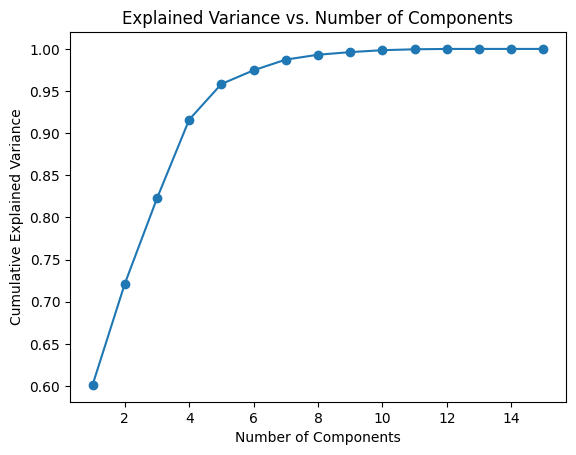

In [52]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()

#### Finding the best number of components by Elbow method

In [53]:
# Calculate the difference in explained variance between components
explained_variance_diff = np.diff(explained_variance)

# Find the index of the elbow point (maximum difference)
elbow_index = np.argmax(explained_variance_diff) + 1

print("Number of components at the elbow point:", elbow_index)

Number of components at the elbow point: 14


#### Find the best number of components by the Threshold method

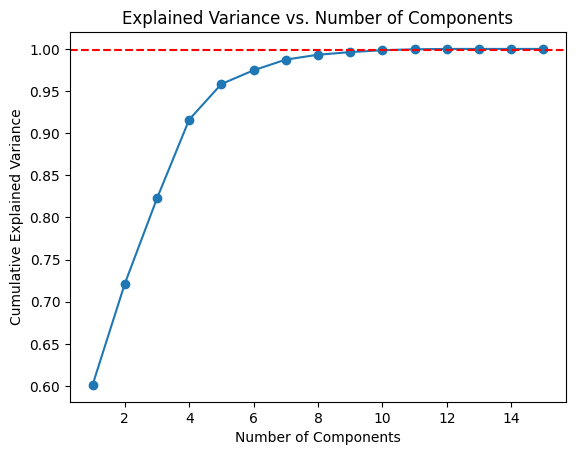

Number of components above the threshold: 11


In [54]:
threshold = 0.999  # Define the desired threshold (e.g., 99% variance explained)

# Find the number of components above the threshold
n_components = np.argmax(cumulative_variance >= threshold) + 1

# Plot the threshold line
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=threshold, color='r', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()

print("Number of components above the threshold:", n_components)

#### From the above mentioned statistical analysis, we see that including more or less 20 components is enough for a variance that levels off

In [55]:
n_components = 14  # Choose the desired number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(scaled_X)

#### Number of Components with impactful positive correlation = 14

In [65]:
y_pca = y.values.ravel()

In [57]:
X_pca, y_pca

(array([[-2.15651388e-01, -1.58125001e-02, -3.07227398e-02, ...,
          1.74856914e-03,  2.27792401e-06,  5.02626817e-16],
        [ 7.43890988e-01, -1.09017880e-01,  3.76253844e-03, ...,
         -2.83703655e-03, -3.04033369e-06,  5.34362538e-17],
        [ 6.87867062e-01, -1.99499883e-01, -1.38057393e-02, ...,
         -1.25821805e-02, -1.57128180e-05, -2.69468440e-17],
        ...,
        [-2.37706766e-01, -7.08973434e-02, -3.33378610e-02, ...,
         -2.29103327e-03, -3.10525970e-06, -3.42320279e-20],
        [-2.37706702e-01, -7.08974730e-02, -3.33377940e-02, ...,
         -2.29155836e-03, -3.10589537e-06, -4.86652662e-19],
        [-2.37706700e-01, -7.08974763e-02, -3.33377923e-02, ...,
         -2.29157152e-03, -3.10591130e-06, -6.06331930e-20]]),
 array([-1,  1,  1, ...,  1,  1,  1]))

In [ ]:
# for n_components in range(1,25):
#    pca = PCA(n_components=n_components)
#    X_pca = pca.fit_transform(scaled_X)

In [ ]:
# Delete variable
# del val

#### The part below is for checking the recall based on the the number of k neighbors used in SMOTE oversampling

In [ ]:
# NOT NEEDED
# values to evaluate
# k_values = [1, 2, 3, 4, 5, 6, 7]
# for k in k_values:
#     # define pipeline
#     model = DecisionTreeClassifier()
#     over = SMOTE(sampling_strategy=0.1, k_neighbors=k)
#     under = RandomUnderSampler(sampling_strategy=0.5)
#     steps = [('over', over), ('under', under), ('model', model)]
#     pipeline = Pipeline(steps=steps)
#     # evaluate pipeline
#     cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#     scores = cross_val_score(pipeline, X_pca, y, scoring='recall', cv=cv, n_jobs=-1)
#     score = mean(scores)
#     print('> k=%d, Mean Recall: %.3f' % (k, score))

#### The code below uses the QBoost to find out good parameters for oversampling, and undersampling

In [58]:
def trainQboost(x, y):
    print('Training QBOOST Model... ')
    qboost = QBoostClassifier(n_estimators=NUM_WEAK_CLASSIFIERS, max_depth=TREE_DEPTH)
    start = timer()
    qboost.fit(x, y, emb_sampler, lmd=lmd, **DW_PARAMS)
    end = timer()
    train_time = end - start
    print('QBoost training time in seconds :', train_time)
    return qboost, train_time

In [59]:
def predictModel(model, x):
    print('Prediction on model :', model)
    start = timer()
    predictions = model.predict(x)
    end = timer()
    predict_time = end - start
    return predictions, predict_time

In [ ]:
# QBoost Parameters and Variables
DW_PARAMS = {'num_reads': 3000,
             'auto_scale': True,
             # "answer_mode": "histogram",
             'num_spin_reversal_transforms': 10,
             # 'annealing_time': 10,
             # 'postprocess': 'optimization',
             }
NUM_WEAK_CLASSIFIERS = 55
TREE_DEPTH = 10
# dwave_sampler = DWaveSampler(token="DEV-98f903479d1e03bc59d7ba92376a492f76f7c906")  # anibrata.pal@uniba.it
dwave_sampler = DWaveSampler(token="DEV-68adb3eb159f7d774b2744b76f46444f8faa1ac5")  # ahanamaitra01@gmail.com
# sa_sampler = micro.dimod.SimulatedAnnealingSampler()
emb_sampler = EmbeddingComposite(dwave_sampler)
lmd = 0.5

NameError: ignored

In [60]:
y_pca

array([-1,  1,  1, ...,  1,  1,  1])

In [ ]:
# def evaluate_over_under():
#     # Nearest neighbor values for SMOTE
#     k_values = [1, 2, 3, 4, 5, 6, 7]
#     s_values = [0.1, 0.2, 0.3, 0.4, 0.5]
#
#     # Create a KFold object with n_splits=10
#     # kf = KFold(n_splits=10)
#     # precision, recall, f1 = 0, 0, 0
#     for s in s_values:
#         for k in k_values:
#             # Declear the models for SMOTE over and Random Undersampling
#             over = SMOTE(sampling_strategy=s, k_neighbors=k)
#             under = RandomUnderSampler(sampling_strategy=0.5)
#             X, y = over.fit_resample(X_pca, y_pca)
#             X, y = under.fit_resample(X, y)
#             print(Counter(y))
#             count = 0
#             x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)
#             model, train_time = trainQboost(x_train, y_train)
#             predictions, predict_time = predictModel(model, x_test)
#             # print('Training Time: %.2f, Prediction Time: %2f' % (train_time, predict_time))
#             # Calculate precision
#             precision = precision_score(y_test, predictions)
#             # Calculate recall
#             recall = recall_score(y_test, predictions)
#             # Calculate F1-score
#             f1 = f1_score(y_test, predictions)
#             print('>> s: %3f -> k: %d -> Precision: %.3f, Recall: %.3f, F1_score: %.3f, Training Time: %.2f, Prediction Time: %2f' %
#                   (s, k, precision, recall, f1, train_time, predict_time))

            # Iterate over the splits for 10 fold validation
            # for train_index, test_index in kf.split(X, y):
            #     # Obtain the training and testing subsets for the current split
            #     # X_train, X_test = X[train_index], X[test_index]
            #     # y_train, y_test = y[train_index], y[test_index]
            #     model, train_time = trainQboost(X[train_index], y[train_index])
            #     predictions, predict_time = predictModel(model, X[test_index])
            #     print('Training Time: %.2f, Prediction Time: %2f' % (train_time, predict_time))
            #     # Calculate precision
            #     precision = precision + precision_score(y[test_index], predictions)
            #     print('Precision: %.3f' % precision)
            #     # Calculate recall
            #     print('Precision: %.3f' % precision)
            #     recall = recall + recall_score(y[test_index], predictions)
            #     # Calculate F1-score
            #     f1 = f1 + f1_score(y[test_index], predictions)
            #     count = count + 1
            # print('> k=%d, Mean Precision: %.3f, Recall: %.3f, F1-Score: %3f' % (k, precision/count, recall/count, f1/count))


In [ ]:
# evaluate_over_under()

In [61]:
print(Counter(y_pca))

Counter({1: 165473, -1: 165463})


In [ ]:
# (40073/585710)*100

In [ ]:
# (292855/585710)*100

In [62]:
def reportResult(y, predictions, model, predict_type, train_time, predict_time):
    print("Reporting Result ...")
    result_time = datetime.now().strftime("%Y%m%d%H%M%S")
    report = classification_report(y, predictions)
    with open('../results/' + str(result_time) + '_' + str(model) + '_' + str(predict_type) + '_report.txt', 'a') as f:
        f.write('Training time :' + str(train_time) + '\n')
        f.write(report)
        f.write('Prediction time :' + str(predict_time) + '\n')
    f.close()
    print("Saved...")

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_pca, y_pca, test_size=0.3, shuffle=True, random_state=32)

In [ ]:
model, train_time = trainQboost(x_train, y_train)

Training QBOOST Model... 
QBoost training time in seconds : 57.322741361975204


In [ ]:
predictions, predict_time = predictModel(model, x_train)

Prediction on model : <qboost.qboost.QBoostClassifier object at 0x7ff6c18ec760>


In [ ]:
reportResult(y_train, predictions, str(model)[1:6], 'training', train_time, predict_time)

Reporting Result ...
Saved...


In [ ]:
predictions, predict_time = predictModel(model, x_test)

Prediction on model : <qboost.qboost.QBoostClassifier object at 0x7ff6c18ec760>


In [ ]:
reportResult(y_test, predictions, str(model)[1:4], 'test', train_time, predict_time)

Reporting Result ...
Saved...


#### Size of Dataframe

In [ ]:
print(sys.getsizeof(df))

45007312


### PegaSos QSVC

In [63]:
scaled_X = MinMaxScaler(feature_range=(0, np.pi)).fit_transform(X)

In [64]:
n_components = 14  # Choose the desired number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(scaled_X)

In [66]:
y_pca = y.values.ravel()

In [67]:
x_train, x_test, y_train, y_test = train_test_split(X_pca, y_pca, test_size=0.3, shuffle=True, random_state=32)

In [68]:
data_dimension = x_train.shape[1]

In [69]:
# Train PegaSOS QSVC
def trainPQSVC(X, y, data_dimension):
    print('Training PegaSOS QSVC Model... ')
    # Number of qubits is equal to the number of features
    num_qubits = data_dimension  # Test with high data dimension to check if this works
    # Number of steps performed during the training procedure
    tau = 100  # Test with other number of steps to check difference in data
    # Regularization parameter
    C = 1000

    # Change the data for PegaSoS QSVC
    # X = MinMaxScaler(feature_range=(0, np.pi)).fit_transform(X)
    # print(len(X))
    # print(len(y))

    # Split dataset into Training and Testing Data
    # x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=32)

    # Define feature maps and kernel
    feature_map = ZFeatureMap(feature_dimension=num_qubits, reps=2)
    qkernel = FidelityQuantumKernel(feature_map=feature_map)

    # algorithm_globals.random_seed = 12345  # Already declared in the global variables
    # Define the Pegasos QSVC classifier
    pegasos_qsvc = PegasosQSVC(quantum_kernel=qkernel, C=C, num_steps=tau)
    # training - fit classifier to data
    start = timer()
    pegasos_qsvc.fit(X, y)
    end = timer()
    train_time = end - start

    return pegasos_qsvc, train_time

In [ ]:
model, train_time = trainPQSVC(x_train, y_train, x_train.shape[1])
predictions, predict_time = predictModel(model, x_train)
reportResult(y_train, predictions, str(model)[1:6], 'training', train_time, predict_time)
predictions, predict_time = predictModel(model, x_test)
reportResult(y_test, predictions, str(model)[1:6], 'testing', train_time, predict_time)

Training PegaSOS QSVC Model... 
Prediction on model : <qiskit_machine_learning.algorithms.classifiers.pegasos_qsvc.PegasosQSVC object at 0x7f1f349689a0>


In [ ]:
predictions, predict_time = predictModel(model, x_train)

In [ ]:
reportResult(y_train, predictions, str(model)[1:6], 'training', train_time, predict_time)

In [ ]:
predictions, predict_time = predictModel(model, x_test)

In [ ]:
reportResult(y_train, predictions, str(model)[1:6], 'training', train_time, predict_time)

### VQC

In [ ]:
# Qiskit globals random seed
algorithm_globals.random_seed = 42

# Create empty array for callback to store evaluations of the objective function as global variable
objective_func_vals = []

In [ ]:
# Callback function that draws a live plot when the .fit() method is called
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)

In [ ]:
# Declare VQC
def vqc_nat(feature_map, ansatz):
    return VQC(
        feature_map=feature_map,
        ansatz=ansatz,
        loss="cross_entropy",
        optimizer=COBYLA(maxiter=30),
        callback=callback_graph,
    )

In [ ]:
# Training VQC
def trainVQC(X, y, data_dimension):
    print('Training VQC Model... ')
    feature_map = ZZFeatureMap(data_dimension, reps=1)
    ansatz = RealAmplitudes(data_dimension, reps=3)
    vqc = vqc_nat(feature_map, ansatz)
    start = timer()
    # fit classifier to data
    vqc.fit(X, y)
    end = timer()
    train_time = end - start
    return vqc, train_time

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_pca, y_pca, test_size=0.3, shuffle=True, random_state=32)

In [ ]:
data_dimension = x_train.shape[1]

In [ ]:
data_dimension

14

In [ ]:
model, train_time = trainVQC(x_train, y_train, data_dimension)
predictions, predict_time = predictModel(model, x_train)
reportResult(y_train, predictions, str(model)[1:6], 'training', train_time, predict_time)

Training VQC Model... 


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
predictions, predict_time = predictModel(model, x_test)
reportResult(y_test, predictions, str(model)[1:6], 'testing', train_time, predict_time)

## The part below is for scratch work

### Correlation Matrix study

In [ ]:
correlation_matrix = df.corr()

In [ ]:
correlation_matrix

,tcp.time_delta,tcp.len,mqtt.conack.val,mqtt.conflag.cleansess,mqtt.conflag.passwd,mqtt.conflag.uname,mqtt.dupflag,mqtt.kalive,mqtt.len,mqtt.msgid,mqtt.msgtype,mqtt.proto_len,mqtt.qos,mqtt.retain,mqtt.ver,target
tcp.time_delta,1.000000,-0.006839,-0.006237,-0.009574,-0.006284,-0.006293,-0.018793,-0.005319,-0.036893,-0.048444,0.282967,-0.009574,-0.038094,-0.001821,-0.009574,-0.091051
tcp.len,-0.006839,1.000000,-0.010344,-0.013420,-0.008602,-0.008615,0.159563,-0.008798,0.274388,0.167136,0.085966,-0.013420,0.271450,0.008837,-0.013420,0.153134
mqtt.conack.val,-0.006237,-0.010344,1.000000,-0.006589,-0.004325,-0.004331,-0.016114,-0.003661,-0.031773,-0.034952,-0.001580,-0.006589,-0.029208,-0.001259,-0.006589,0.065829
mqtt.conflag.cleansess,-0.009574,-0.013420,-0.006589,1.000000,0.656374,0.657300,-0.024498,0.555609,0.001759,-0.053137,-0.056412,1.000000,-0.044405,-0.001914,1.000000,0.100080
mqtt.conflag.passwd,-0.006284,-0.008602,-0.004325,0.656374,1.000000,0.998590,-0.016080,-0.002566,-0.005277,-0.034878,-0.037027,0.656374,-0.029146,-0.001256,0.656374,0.065690
mqtt.conflag.uname,-0.006293,-0.008615,-0.004331,0.657300,0.998590,1.000000,-0.016102,-0.002569,-0.005299,-0.034927,-0.037080,0.657300,-0.029188,-0.001258,0.657300,0.065783
mqtt.dupflag,-0.018793,0.159563,-0.016114,-0.024498,-0.016080,-0.016102,1.000000,-0.013611,0.545516,0.388063,0.126216,-0.024498,0.551688,-0.004681,-0.024498,0.244767
mqtt.kalive,-0.005319,-0.008798,-0.003661,0.555609,-0.002566,-0.002569,-0.013611,1.000000,-0.001531,-0.029524,-0.031343,0.555609,-0.024672,-0.001063,0.555609,0.055605
mqtt.len,-0.036893,0.274388,-0.031773,0.001759,-0.005277,-0.005299,0.545516,-0.001531,1.000000,0.595785,0.261949,0.001759,0.988156,0.002314,0.001759,0.409264
mqtt.msgid,-0.048444,0.167136,-0.034952,-0.053137,-0.034878,-0.034927,0.388063,-0.029524,0.595785,1.000000,0.390695,-0.053137,0.612174,-0.010154,-0.053137,0.530914


In [ ]:
cm = correlation_matrix

In [ ]:
cm

In [ ]:
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()

In [ ]:
single_feature_correlation = correlation_matrix['target']

In [ ]:
single_feature_correlation

tcp.time_delta           -0.091051
tcp.len                   0.153134
mqtt.conack.val           0.065829
mqtt.conflag.cleansess    0.100080
mqtt.conflag.passwd       0.065690
mqtt.conflag.uname        0.065783
mqtt.dupflag              0.244767
mqtt.kalive               0.055605
mqtt.len                  0.409264
mqtt.msgid                0.530914
mqtt.msgtype             -0.004340
mqtt.proto_len            0.100080
mqtt.qos                  0.443668
mqtt.retain               0.019124
mqtt.ver                  0.100080
target                    1.000000
Name: target, dtype: float64

In [ ]:
# Select NaN values
nan_values = single_feature_correlation[single_feature_correlation.isnull()]

In [ ]:
nan_values

In [ ]:
X['Flow_Byts/s']